In [ ]:
!pip install geopandas fiona shapely pygeos pyproj

     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 16.7 MB 45.8 MB/s 
     |████████████████████████████████| 2.1 MB 46.2 MB/s 
     |████████████████████████████████| 6.3 MB 39.9 MB/s 


In [ ]:
# !pip uninstall rtree
# sudo apt install libspatialindex-dev
!pip install rtree

     |████████████████████████████████| 1.0 MB 8.3 MB/s 


In [ ]:
DIR = "/content/drive/MyDrive/College (Master)/Semester 1/COMP90024 - Cluster and Cloud Computing/Assignment/CCC Assignment 2 - 2022/Data Exploration"

In [ ]:
import fiona
import shapely
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
LOCATIONS = {}
LOCATIONS["west"] = [144.317,-38.000, 144.856, -37.166]
LOCATIONS["north"] = [144.856, -38.000, 145.185, -37.166]
LOCATIONS["east"] = [145.185, -38.000, 145.901, -37.166]
LOCATIONS["south"] = [144.655, -38.533, 145.901, -38.000]

# Read Data

In [ ]:
solar = pd.read_csv(DIR + '/abs_data_by_region_land_and_environment_asgs_sa2_2014_2018-2936901262497390773.csv')
motor_vehicle = pd.read_csv(DIR + '/sa2_g30_number_motor_vehicles_by_dwelling_census_2016-3183873885252962392.csv')
population = pd.read_csv(DIR + '/abs_regional_population_sa2_2001_2019-8417943560197027149.csv')
agriculture = pd.read_csv(DIR + '/agri_value_local_sa2_2015_16-2407662025043266683.csv')

In [ ]:
solar.head(3)

,protected_areas_year_ended_30_june_all_other_protected_areas_ha,protected_areas_year_ended_30_june_protected_areas_num,land_area_land_area_ha,slr_instlltns_accmltve_ttl_2001_incrse_wtr_htr_frm_prvs_yr_pc,protected_areas_year_ended_30_june_national_parks_pc,sa2_maincode_2016,protected_areas_year_ended_30_june_indigenous_protected_area_ha,protected_areas_year_ended_30_june_protected_areas_total_pc,protected_areas_year_ended_30_june_nature_reserves_pc,protected_areas_year_ended_30_june_nature_reserves_num,...,sa2_name_2016,protected_areas_year_ended_30_june_protected_areas_total_num,yr,protected_areas_year_ended_30_june_all_other_protected_areas_pc,solar_installations_accumulative_total_2001_water_heater_num,protected_areas_year_ended_30_june_protected_areas_total_ha,protected_areas_year_ended_30_june_national_parks_ha,slr_instlltns_accmltve_ttl_2001_incrse_pnl_frm_prvs_yr_pc,protected_areas_year_ended_30_june_indigenous_area_num,protected_areas_year_ended_30_june_nature_reserves_ha
0,NaN,NaN,150.3,NaN,NaN,206041125,NaN,NaN,NaN,NaN,...,South Yarra - West,NaN,2018,NaN,17.0,NaN,NaN,12.5,NaN,NaN
1,NaN,NaN,458.8,17.9,NaN,208021427,NaN,NaN,NaN,NaN,...,Bentleigh East (South),NaN,2018,NaN,540.0,NaN,NaN,12.6,NaN,NaN
2,NaN,NaN,530.7,12.4,NaN,208031183,NaN,NaN,NaN,NaN,...,Aspendale Gardens - Waterways,NaN,2018,NaN,190.0,NaN,NaN,14.5,NaN,NaN


In [ ]:
motor_vehicle.head(3)

,sa2_name16,num_mvs_ns,num_mvs_per_dweling_2_mvs,num_mvs_per_dweling_1_mvs,num_mvs_per_dweling_3_mvs,total_dwelings,sa2_main16,num_mvs_per_dweling_tot,num_mvs_per_dweling_0_mvs,num_mvs_per_dweling_4mo_mvs
0,Cranbourne North,182,2836,1497,924,5956,212031302,5773,111,416
1,Cranbourne South,76,1178,475,512,2773,212031303,2693,49,480
2,Cranbourne West,146,2239,1279,657,4635,212031304,4486,80,234


In [ ]:
population.head(3)

,births_2017_18,births_2016_17,erp_change_number_2018_19,erp_change_per_cent_2018_19,deaths_2018_19,sa2_name_2016,internal_departures_2018_19,pop_density_2019_people_per_km2,gccsa_name_2016,natural_increase_2018_19,...,erp_2001,erp_2003,erp_2002,erp_2005,erp_2004,internal_arrivals_2018_19,gccsa_code_2016,net_overseas_migration_2017_18,births_2018_19,sa3_code_2016
0,66,83,193,2.0858,70,Mansfield (Vic.),527,2.404900,Rest of Vic.,2,...,6907,7037,6982,7408,7158,653,2RVIC,65,72,20401
1,262,256,676,3.8027,131,Drouin,1722,56.464699,Rest of Vic.,137,...,9882,10130,10015,10472,10340,2229,2RVIC,33,268,20501
2,40,42,44,0.7158,39,Mount Baw Baw Region,461,2.248600,Rest of Vic.,24,...,5736,5762,5750,5815,5801,469,2RVIC,13,63,20501


In [ ]:
agriculture.head(3)

,frt_nut_grapes_wine_prod,hay_crl_for_hay,frt_nut_pome_frt_apples,brdacrcrp_crlcrp_brly,brdacrcrp_crlcrp_maize,frt_nut_grapes_total,frt_nut_stn_frt_cherries,frt_nut_pome_frt_pear,frt_nut_citrus_oth_nec,frt_nut_pome_frt_oth_nec,...,brdacrcrp_non_crlcrp_oilseed_canola,veggies_sweet_corn,frt_nut_grapes_oth_use,frt_nut_nuts_macadamias,nursry_flwrs_turf_nurseries,veggies_capsicum,sa2_code11,brdacrcrp_non_crlcrp_oth_pulses,frt_nut_nuts_oth_nec,brdacrcrp_crlcrp_oats
0,182140.27,68124.94,NaN,NaN,NaN,182140.27,NaN,NaN,NaN,NaN,...,74798.3,NaN,NaN,NaN,NaN,NaN,204011062,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,212031304,NaN,NaN,NaN
2,NaN,NaN,2840176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,117943.91,NaN,205011076,NaN,NaN,NaN


In [ ]:
agriculture.columns

Index(['frt_nut_grapes_wine_prod', ' hay_crl_for_hay',
       ' frt_nut_pome_frt_apples', ' brdacrcrp_crlcrp_brly',
       ' brdacrcrp_crlcrp_maize', ' frt_nut_grapes_total',
       ' frt_nut_stn_frt_cherries', ' frt_nut_pome_frt_pear',
       ' frt_nut_citrus_oth_nec', ' frt_nut_pome_frt_oth_nec',
       ...
       ' brdacrcrp_non_crlcrp_oilseed_canola', ' veggies_sweet_corn',
       ' frt_nut_grapes_oth_use', ' frt_nut_nuts_macadamias',
       ' nursry_flwrs_turf_nurseries', ' veggies_capsicum', ' sa2_code11',
       ' brdacrcrp_non_crlcrp_oth_pulses', ' frt_nut_nuts_oth_nec',
       ' brdacrcrp_crlcrp_oats'],
      dtype='object', length=101)

In [ ]:
sa3_code_solar = list(solar[" sa2_maincode_2016"])
sa3_code_mh = list(motor_vehicle[" sa2_main16"])
sa3_code_pop = list(population[" sa2_maincode_2016"])
sa3_code_agri = list(agriculture[" sa2_code11"])

sa3_code = set(sa3_code_solar) | set(sa3_code_mh) | set(sa3_code_pop) | set(sa3_code_agri)
sa3_code = list(sa3_code)

print(sa3_code)

[209041430, 209041431, 209041432, 209041433, 209041434, 209041435, 209041436, 206041117, 206041118, 206041119, 206041120, 206041121, 206041122, 206041123, 206041124, 206041125, 206041126, 206041127, 209031209, 209031210, 209031211, 209031212, 209031213, 209031214, 209031215, 212021295, 212021297, 212021293, 212021299, 212021294, 213051464, 213051465, 213051466, 213051467, 213051468, 210011226, 210011227, 210011228, 210011229, 210011230, 210011231, 207021156, 207021157, 207021159, 207021160, 205011076, 205011077, 205011079, 202021028, 202021030, 202021031, 210051242, 210051243, 210051244, 210051245, 210051246, 210051247, 210051248, 210051249, 210051250, 213041353, 213041355, 213041356, 212021453, 212021454, 212021455, 213041360, 212021456, 213041357, 213041358, 213041359, 211031263, 211031265, 211031266, 211031267, 211031268, 208041194, 208041195, 214021377, 214021378, 214021379, 214021380, 214021381, 214021382, 214021383, 214021384, 206031113, 206031114, 206031115, 206031116, 214021385

In [ ]:
# List down all layers
for layername in fiona.listlayers(DIR + '/asgs2016.gpkg'):
    print("===============%s==============" % (layername))
    geopkg = gpd.read_file(DIR + '/asgs2016.gpkg', layer=layername)
    i = 0
    for name in geopkg.columns:
        print(name)
        i += 1

===============australia_2016==============
AUS_CODE_2016
AUS_NAME_2016
geometry
===============greater_capital_city_statistical_area_2016==============
GCCSA_CODE_2016
GCCSA_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============state_2016==============
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_1_2016==============
SA1_MAINCODE_2016
SA1_7DIGITCODE_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_2_2016==============
SA2_MAINCODE_2016
SA2_5DIGITCODE_2016
SA2_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_3_2016==============
SA3_CODE_2016
SA3_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_4_2016==============
SA4_CODE_2016
SA4_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============mesh_block_2016==============
MB_CODE_2016
ADD_CODE_2016
ADD_NAME_2016
AUS_CODE_2016
AUS_NAME_2016
CED_CODE_2016
CED_NAME_2016
DZN_CODE_2016
DZN_NAME_2016
G

In [ ]:
geopkg = gpd.read_file(DIR + '/asgs2016.gpkg', layer="statistical_area_level_2_2016")
geopkg.columns

Index(['SA2_MAINCODE_2016', 'SA2_5DIGITCODE_2016', 'SA2_NAME_2016',
       'STE_CODE_2016', 'STE_NAME_2016', 'geometry'],
      dtype='object')

In [ ]:
geopkg

,SA2_MAINCODE_2016,SA2_5DIGITCODE_2016,SA2_NAME_2016,STE_CODE_2016,STE_NAME_2016,geometry
0,511041285,51285,Geraldton,5,Western Australia,"MULTIPOLYGON (((114.61257 -28.76629, 114.61253..."
1,511041287,51287,Geraldton - North,5,Western Australia,"MULTIPOLYGON (((114.60914 -28.67761, 114.60868..."
2,511041288,51288,Geraldton - South,5,Western Australia,"MULTIPOLYGON (((114.60857 -28.79258, 114.61024..."
3,901021002,91002,Cocos (Keeling) Islands,9,Other Territories,"MULTIPOLYGON (((96.81703 -12.14427, 96.81703 -..."
4,901011001,91001,Christmas Island,9,Other Territories,"MULTIPOLYGON (((105.67392 -10.41567, 105.67381..."
...,...,...,...,...,...,...
2305,799999499,79499,No usual address (NT),7,Northern Territory,None
2306,897979799,89799,Migratory - Offshore - Shipping (ACT),8,Australian Capital Territory,None
2307,899999499,89499,No usual address (ACT),8,Australian Capital Territory,None
2308,997979799,99799,Migratory - Offshore - Shipping (OT),9,Other Territories,None


In [ ]:
geometry_list = {}

for code in sa3_code:
    # print(geopkg[geopkg.SA3_CODE_2016 == str(code)]["geometry"].values)
    geometry_list[str(code)] = geopkg[geopkg.SA2_MAINCODE_2016 == str(code)]["geometry"].values

In [ ]:
geometry_list

{'201021009': <GeometryArray>
 Length: 1, dtype: geometry, '201021011': <GeometryArray>
 Length: 1, dtype: geometry, '202021028': <GeometryArray>
 Length: 1, dtype: geometry, '202021030': <GeometryArray>
 Length: 1, dtype: geometry, '202021031': <GeometryArray>
 Length: 1, dtype: geometry, '203021037': <GeometryArray>
 Length: 1, dtype: geometry, '203021038': <GeometryArray>
 Length: 1, dtype: geometry, '203021039': <GeometryArray>
 Length: 1, dtype: geometry, '203021040': <GeometryArray>
 Length: 1, dtype: geometry, '203021041': <GeometryArray>
 Length: 1, dtype: geometry, '203021042': <GeometryArray>
 Length: 1, dtype: geometry, '203021043': <GeometryArray>
 Length: 1, dtype: geometry, '203021044': <GeometryArray>
 Length: 1, dtype: geometry, '203021045': <GeometryArray>
 Length: 1, dtype: geometry, '203021046': <GeometryArray>
 Length: 1, dtype: geometry, '203021047': <GeometryArray>
 Length: 1, dtype: geometry, '203031048': <GeometryArray>
 Length: 1, dtype: geometry, '203031050': 

# Classify each code to directions

## Generate points in bounding boxes

In [ ]:
from shapely.geometry import Polygon, LineString, Point

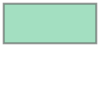

In [ ]:
new_directions = {}

for direction, coord in LOCATIONS.items():
    lon1 = coord[0]
    lat1 = coord[1]

    lon2 = coord[2]
    lat2 = coord[3]

    points = []
    points.append((lon1, lat1))
    points.append((lon2, lat1))
    points.append((lon2, lat2))
    points.append((lon1, lat2))
    polygons = Polygon(points)
    new_directions[direction] = polygons

new_directions['south']

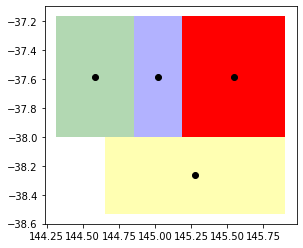

In [ ]:
polys1 = gpd.GeoSeries(new_directions['east'])
polys2 = gpd.GeoSeries(new_directions['west'])
polys3 = gpd.GeoSeries(new_directions['north'])
polys4 = gpd.GeoSeries(new_directions['south'])

df1 = gpd.GeoDataFrame({'geometry': polys1})
df2 = gpd.GeoDataFrame({'geometry': polys2})
df3 = gpd.GeoDataFrame({'geometry': polys3})
df4 = gpd.GeoDataFrame({'geometry': polys4})

centre_point1 = gpd.GeoSeries(Point([(144.5865, -37.583)]))
centre_point2 = gpd.GeoSeries(Point([(145.0205, -37.583)]))
centre_point3 = gpd.GeoSeries(Point([(145.543, -37.583)]))
centre_point4 = gpd.GeoSeries(Point([(145.2780, -38.2665)]))

centre1 = gpd.GeoDataFrame({'geometry': centre_point1})
centre2 = gpd.GeoDataFrame({'geometry': centre_point2})
centre3 = gpd.GeoDataFrame({'geometry': centre_point3})
centre4 = gpd.GeoDataFrame({'geometry': centre_point4})

ax = df1.plot(color='red')
df2.plot(ax=ax, color='green', alpha=0.3)
df3.plot(ax=ax, color='blue', alpha=0.3)
df4.plot(ax=ax, color='yellow', alpha=0.3)
centre1.plot(ax=ax, color='black')
centre2.plot(ax=ax, color='black')
centre3.plot(ax=ax, color='black')
centre4.plot(ax=ax, color='black')

In [ ]:
df_locations = \
{
    'east': df1,
    'west': df2,
    'north': df3,
    'south': df4
}

## Check intersection

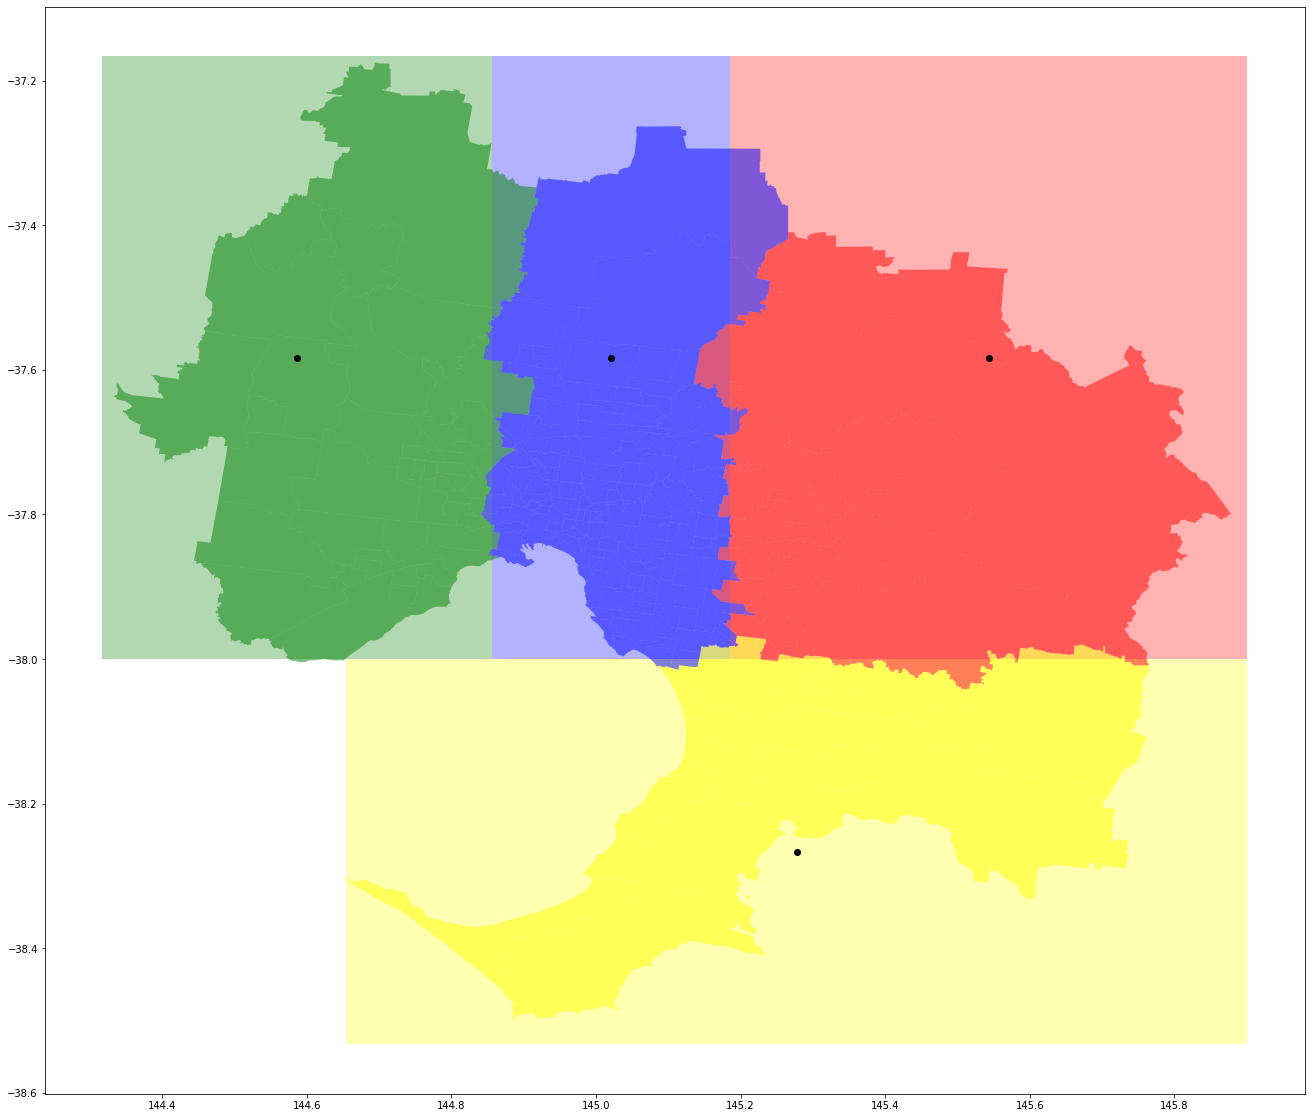

In [ ]:
areas_classification = {'west': [], 'east': [], 'north': [], 'south': []}
color_classification = {'west': "green", 'east': "red", 'north': "blue", 'south': "yellow"}
classified = []
excluded = ['204011062', 
            '205031089',
            '205031091',
            '205031088',
            '203031051',
            '202021030',
            '205011076',
            '204011056',
            '202021031']

ax = df1.plot(color='red', alpha=0.3, figsize=(30,20))
df2.plot(ax=ax, color='green', alpha=0.3)
df3.plot(ax=ax, color='blue', alpha=0.3)
df4.plot(ax=ax, color='yellow', alpha=0.3)

for key, poly in geometry_list.items():
    if key not in classified and key not in excluded:
        max = 0
        max_dir = ""
        for direction, poly_dir in df_locations.items():
            polys_df = gpd.GeoDataFrame({'geometry': poly})
            intersection = polys_df.overlay(poly_dir, how='intersection')
            if intersection.values:
                if intersection.area.values[0] / polys_df.area.values[0] >= 0.55:
                    if intersection.area.values[0] > max:
                        max = intersection.area.values[0]
                        max_dir = direction

        if max_dir != "":
            areas_classification[max_dir].append(key)

            # Plot
            polys_df['coords'] = polys_df['geometry'].apply(lambda x: x.representative_point().coords[:])
            polys_df['coords'] = [coords[0] for coords in polys_df['coords']]
            polys_df.plot(ax=ax, color=color_classification[max_dir], alpha=0.5)

            # for idx, row in polys_df.iterrows():
            #     plt.annotate(s=key, xy=row['coords'],
            #                 horizontalalignment='center')
        
        classified.append(key)

centre_point1 = gpd.GeoSeries(Point([(144.5865, -37.583)]))
centre_point2 = gpd.GeoSeries(Point([(145.0205, -37.583)]))
centre_point3 = gpd.GeoSeries(Point([(145.543, -37.583)]))
centre_point4 = gpd.GeoSeries(Point([(145.2780, -38.2665)]))

centre1.plot(ax=ax, color='black')
centre2.plot(ax=ax, color='black')
centre3.plot(ax=ax, color='black')
centre4.plot(ax=ax, color='black')

In [ ]:
population.columns

Index(['births_2017_18', ' births_2016_17', ' erp_change_number_2018_19',
       ' erp_change_per_cent_2018_19', ' deaths_2018_19', ' sa2_name_2016',
       ' internal_departures_2018_19', ' pop_density_2019_people_per_km2',
       ' gccsa_name_2016', ' natural_increase_2018_19',
       ' overseas_departures_2018_19', ' natural_increase_2017_18',
       ' overseas_departures_2017_18', ' internal_arrivals_2017_18',
       ' deaths_2017_18', ' internal_arrivals_2016_17', ' state_name_2016',
       ' internal_departures_2016_17', ' deaths_2016_17', ' erp_2017',
       ' erp_2018', ' erp_2019', ' net_internal_migration_2017_18',
       ' net_overseas_migration_2016_17', ' sa3_name_2016',
       ' net_internal_migration_2018_19', ' net_overseas_migration_2018_19',
       ' overseas_arrivals_2016_17', ' area_km2', ' overseas_arrivals_2017_18',
       ' state_code_2016', ' erp_2008', ' erp_2009', ' erp_2006', ' erp_2007',
       ' net_internal_migration_2016_17', ' erp_2012', ' erp_2011',
   

In [ ]:
# Embed the classification in dataframe for easy aggregation
motor_vehicle['area_classification'] = "outer"
solar['area_classification'] = "outer"

for direction, code_list in areas_classification.items():
    for code in code_list:
        sa3_code_solar = list(solar[" sa2_maincode_2016"])
        sa3_code_mh = list(motor_vehicle[" sa2_main16"])
        sa3_code_pop = list(population[" sa2_maincode_2016"])
        sa3_code_agri = list(agriculture[" sa2_code11"])

        motor_vehicle.loc[motor_vehicle[' sa2_main16'] == int(code), 'area_classification'] = direction
        solar.loc[solar[' sa2_maincode_2016'] == int(code), 'area_classification'] = direction
        population.loc[population[' sa2_maincode_2016'] == int(code), 'area_classification'] = direction
        agriculture.loc[agriculture[' sa2_code11'] == int(code), 'area_classification'] = direction

In [ ]:
solar['area_classification'].value_counts()

north    168
east      50
west      48
south     43
outer     36
Name: area_classification, dtype: int64

In [ ]:
motor_vehicle['area_classification'].value_counts()

north    168
east      50
west      48
south     43
outer     28
Name: area_classification, dtype: int64

In [ ]:
population['area_classification'].value_counts()

north    168
east      50
west      48
south     43
Name: area_classification, dtype: int64

In [ ]:
agriculture['area_classification'].value_counts()

south    27
west     23
east     20
north    18
Name: area_classification, dtype: int64

# Analyze AURIN Data

## Basic summarization solar

In [ ]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 24 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   protected_areas_year_ended_30_june_all_other_protected_areas_ha   107 non-null    float64
 1    protected_areas_year_ended_30_june_protected_areas_num           110 non-null    float64
 2    land_area_land_area_ha                                           345 non-null    float64
 3    slr_instlltns_accmltve_ttl_2001_incrse_wtr_htr_frm_prvs_yr_pc    325 non-null    float64
 4    protected_areas_year_ended_30_june_national_parks_pc             31 non-null     float64
 5    sa2_maincode_2016                                                345 non-null    int64  
 6    protected_areas_year_ended_30_june_indigenous_protected_area_ha  0 non-null      float64
 7    protected_areas_year_ended_30_june

In [ ]:
solar.head()

,protected_areas_year_ended_30_june_all_other_protected_areas_ha,protected_areas_year_ended_30_june_protected_areas_num,land_area_land_area_ha,slr_instlltns_accmltve_ttl_2001_incrse_wtr_htr_frm_prvs_yr_pc,protected_areas_year_ended_30_june_national_parks_pc,sa2_maincode_2016,protected_areas_year_ended_30_june_indigenous_protected_area_ha,protected_areas_year_ended_30_june_protected_areas_total_pc,protected_areas_year_ended_30_june_nature_reserves_pc,protected_areas_year_ended_30_june_nature_reserves_num,...,protected_areas_year_ended_30_june_protected_areas_total_num,yr,protected_areas_year_ended_30_june_all_other_protected_areas_pc,solar_installations_accumulative_total_2001_water_heater_num,protected_areas_year_ended_30_june_protected_areas_total_ha,protected_areas_year_ended_30_june_national_parks_ha,slr_instlltns_accmltve_ttl_2001_incrse_pnl_frm_prvs_yr_pc,protected_areas_year_ended_30_june_indigenous_area_num,protected_areas_year_ended_30_june_nature_reserves_ha,area_classification
0,NaN,NaN,150.3,NaN,NaN,206041125,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,17.0,NaN,NaN,12.5,NaN,NaN,north
1,NaN,NaN,458.8,17.9,NaN,208021427,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,540.0,NaN,NaN,12.6,NaN,NaN,north
2,NaN,NaN,530.7,12.4,NaN,208031183,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,190.0,NaN,NaN,14.5,NaN,NaN,south
3,NaN,NaN,319.6,11.0,NaN,208031187,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,121.0,NaN,NaN,10.2,NaN,NaN,south
4,NaN,NaN,359.7,9.7,NaN,207031162,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,261.0,NaN,NaN,10.0,NaN,NaN,north


In [ ]:
solar.describe()

,protected_areas_year_ended_30_june_all_other_protected_areas_ha,protected_areas_year_ended_30_june_protected_areas_num,land_area_land_area_ha,slr_instlltns_accmltve_ttl_2001_incrse_wtr_htr_frm_prvs_yr_pc,protected_areas_year_ended_30_june_national_parks_pc,sa2_maincode_2016,protected_areas_year_ended_30_june_indigenous_protected_area_ha,protected_areas_year_ended_30_june_protected_areas_total_pc,protected_areas_year_ended_30_june_nature_reserves_pc,protected_areas_year_ended_30_june_nature_reserves_num,...,protected_areas_year_ended_30_june_national_parks_num,protected_areas_year_ended_30_june_protected_areas_total_num,yr,protected_areas_year_ended_30_june_all_other_protected_areas_pc,solar_installations_accumulative_total_2001_water_heater_num,protected_areas_year_ended_30_june_protected_areas_total_ha,protected_areas_year_ended_30_june_national_parks_ha,slr_instlltns_accmltve_ttl_2001_incrse_pnl_frm_prvs_yr_pc,protected_areas_year_ended_30_june_indigenous_area_num,protected_areas_year_ended_30_june_nature_reserves_ha
count,107.000000,110.000000,345.000000,325.000000,31.000000,3.450000e+02,0.0,112.000000,0.0,0.0,...,32.00000,114.000000,345.0,106.000000,338.000000,112.000000,32.000000,339.000000,0.0,0.0
mean,582.859813,9.645455,9709.123478,9.426769,14.248387,2.093695e+08,NaN,6.967857,NaN,NaN,...,1.65625,9.771930,2018.0,3.196226,640.319527,2817.151786,7911.000000,13.845133,NaN,NaN
std,1251.721377,15.046464,34842.132729,7.433461,14.934878,3.118154e+06,NaN,10.371037,NaN,NaN,...,1.38213,15.297079,0.0,4.308572,859.795724,8295.119015,12382.253894,5.707832,NaN,NaN
min,1.000000,1.000000,126.700000,0.900000,0.200000,2.010210e+08,NaN,0.100000,NaN,NaN,...,1.00000,1.000000,2018.0,0.100000,3.000000,1.000000,2.000000,1.200000,NaN,NaN
25%,23.500000,1.000000,493.000000,4.700000,3.600000,2.070112e+08,NaN,0.600000,NaN,NaN,...,1.00000,1.000000,2018.0,0.600000,191.500000,21.750000,270.500000,11.250000,NaN,NaN
50%,142.000000,4.000000,860.800000,8.000000,10.300000,2.100212e+08,NaN,2.700000,NaN,NaN,...,1.00000,4.000000,2018.0,1.700000,323.500000,159.000000,3038.000000,12.700000,NaN,NaN
75%,451.000000,10.750000,2420.200000,12.500000,17.450000,2.120313e+08,NaN,8.925000,NaN,NaN,...,2.00000,10.000000,2018.0,3.575000,665.500000,1238.250000,10040.500000,15.150000,NaN,NaN
max,8131.000000,83.000000,392787.700000,66.300000,60.400000,2.140214e+08,NaN,61.400000,NaN,NaN,...,6.00000,83.000000,2018.0,20.600000,6536.000000,59000.000000,50869.000000,75.600000,NaN,NaN


## Basic summarization motor vehicle

In [ ]:
motor_vehicle.head()

,sa2_name16,num_mvs_ns,num_mvs_per_dweling_2_mvs,num_mvs_per_dweling_1_mvs,num_mvs_per_dweling_3_mvs,total_dwelings,sa2_main16,num_mvs_per_dweling_tot,num_mvs_per_dweling_0_mvs,num_mvs_per_dweling_4mo_mvs,area_classification
0,Cranbourne North,182,2836,1497,924,5956,212031302,5773,111,416,south
1,Cranbourne South,76,1178,475,512,2773,212031303,2693,49,480,south
2,Cranbourne West,146,2239,1279,657,4635,212031304,4486,80,234,south
3,Prahran - Windsor,290,1860,4537,307,8983,206061136,8693,1916,81,north
4,Collingwood,189,531,1787,85,3729,206071141,3545,1114,22,north


In [ ]:
motor_vehicle.describe()

,num_mvs_ns,num_mvs_per_dweling_2_mvs,num_mvs_per_dweling_1_mvs,num_mvs_per_dweling_3_mvs,total_dwelings,sa2_main16,num_mvs_per_dweling_tot,num_mvs_per_dweling_0_mvs,num_mvs_per_dweling_4mo_mvs
count,337.00000,337.000000,337.000000,337.000000,337.000000,3.370000e+02,337.000000,337.000000,337.000000
mean,164.00000,1861.531157,1756.000000,561.685460,5066.163205,2.094787e+08,4901.946588,428.442136,294.249258
std,103.06303,880.644985,1062.748822,285.679405,2409.504796,3.071458e+06,2324.009908,809.598907,176.724926
min,0.00000,0.000000,0.000000,0.000000,0.000000,2.010210e+08,0.000000,0.000000,0.000000
25%,93.00000,1179.000000,1028.000000,355.000000,3386.000000,2.070214e+08,3294.000000,112.000000,159.000000
50%,144.00000,1837.000000,1621.000000,545.000000,4792.000000,2.100312e+08,4644.000000,248.000000,282.000000
75%,208.00000,2492.000000,2361.000000,755.000000,6594.000000,2.120315e+08,6365.000000,493.000000,401.000000
max,717.00000,4550.000000,6502.000000,1357.000000,16284.000000,2.140214e+08,15565.000000,11725.000000,898.000000


## Basic summarization population

In [ ]:
population.columns

Index(['births_2017_18', ' births_2016_17', ' erp_change_number_2018_19',
       ' erp_change_per_cent_2018_19', ' deaths_2018_19', ' sa2_name_2016',
       ' internal_departures_2018_19', ' pop_density_2019_people_per_km2',
       ' gccsa_name_2016', ' natural_increase_2018_19',
       ' overseas_departures_2018_19', ' natural_increase_2017_18',
       ' overseas_departures_2017_18', ' internal_arrivals_2017_18',
       ' deaths_2017_18', ' internal_arrivals_2016_17', ' state_name_2016',
       ' internal_departures_2016_17', ' deaths_2016_17', ' erp_2017',
       ' erp_2018', ' erp_2019', ' net_internal_migration_2017_18',
       ' net_overseas_migration_2016_17', ' sa3_name_2016',
       ' net_internal_migration_2018_19', ' net_overseas_migration_2018_19',
       ' overseas_arrivals_2016_17', ' area_km2', ' overseas_arrivals_2017_18',
       ' state_code_2016', ' erp_2008', ' erp_2009', ' erp_2006', ' erp_2007',
       ' net_internal_migration_2016_17', ' erp_2012', ' erp_2011',
   

In [ ]:
population.head()

,births_2017_18,births_2016_17,erp_change_number_2018_19,erp_change_per_cent_2018_19,deaths_2018_19,sa2_name_2016,internal_departures_2018_19,pop_density_2019_people_per_km2,gccsa_name_2016,natural_increase_2018_19,...,erp_2003,erp_2002,erp_2005,erp_2004,internal_arrivals_2018_19,gccsa_code_2016,net_overseas_migration_2017_18,births_2018_19,sa3_code_2016,area_classification
0,66,83,193,2.0858,70,Mansfield (Vic.),527,2.404900,Rest of Vic.,2,...,7037,6982,7408,7158,653,2RVIC,65,72,20401,NaN
1,262,256,676,3.8027,131,Drouin,1722,56.464699,Rest of Vic.,137,...,10130,10015,10472,10340,2229,2RVIC,33,268,20501,NaN
2,40,42,44,0.7158,39,Mount Baw Baw Region,461,2.248600,Rest of Vic.,24,...,5762,5750,5815,5801,469,2RVIC,13,63,20501,NaN
3,196,247,616,3.0574,149,Warragul,1586,58.958599,Rest of Vic.,82,...,14501,14327,14959,14654,2047,2RVIC,74,231,20501,NaN
4,69,78,85,0.9451,83,Foster,598,6.057300,Rest of Vic.,-5,...,8198,8242,8167,8173,662,2RVIC,27,78,20503,NaN


In [ ]:
population.describe()

,births_2017_18,births_2016_17,erp_change_number_2018_19,erp_change_per_cent_2018_19,deaths_2018_19,internal_departures_2018_19,pop_density_2019_people_per_km2,natural_increase_2018_19,overseas_departures_2018_19,natural_increase_2017_18,...,overseas_departures_2016_17,erp_2001,erp_2003,erp_2002,erp_2005,erp_2004,internal_arrivals_2018_19,net_overseas_migration_2017_18,births_2018_19,sa3_code_2016
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,...,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,192.817391,193.855072,362.889855,2.287863,86.605797,1592.681159,2145.482570,102.484058,225.197101,106.376812,...,191.127536,11162.197101,11458.663768,11307.089855,11777.368116,11606.817391,1621.063768,239.092754,189.089855,20936.823188
std,127.159846,120.891032,665.642201,5.495280,56.095651,820.048029,2175.464110,120.814654,469.805961,119.499964,...,430.988764,6054.757720,5920.622797,5992.147619,5839.291448,5869.107812,997.242440,315.675222,128.262293,311.805229
min,0.000000,0.000000,-81.000000,-0.908900,0.000000,0.000000,0.000000,-126.000000,0.000000,-147.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20102.000000
25%,108.000000,109.000000,61.000000,0.507400,44.000000,971.000000,552.377197,34.000000,48.000000,34.000000,...,39.000000,6949.000000,7181.000000,7043.000000,7861.000000,7522.000000,945.000000,71.000000,106.000000,20701.000000
50%,168.000000,176.000000,166.000000,1.150200,75.000000,1512.000000,1941.392456,76.000000,123.000000,79.000000,...,104.000000,10608.000000,11025.000000,10639.000000,11428.000000,11188.000000,1464.000000,164.000000,166.000000,21002.000000
75%,255.000000,261.000000,373.000000,2.181800,120.000000,2112.000000,2927.894287,134.000000,238.000000,147.000000,...,199.000000,15726.000000,15843.000000,15842.000000,16038.000000,15922.000000,2062.000000,292.000000,244.000000,21203.000000
max,1006.000000,912.000000,7818.000000,69.112000,328.000000,4420.000000,21905.445312,960.000000,6711.000000,941.000000,...,6347.000000,26445.000000,26263.000000,26384.000000,25768.000000,26062.000000,9640.000000,3772.000000,1017.000000,21402.000000


## Basic summarization agriculture

In [ ]:
agriculture.columns

Index(['frt_nut_grapes_wine_prod', ' hay_crl_for_hay',
       ' frt_nut_pome_frt_apples', ' brdacrcrp_crlcrp_brly',
       ' brdacrcrp_crlcrp_maize', ' frt_nut_grapes_total',
       ' frt_nut_stn_frt_cherries', ' frt_nut_pome_frt_pear',
       ' frt_nut_citrus_oth_nec', ' frt_nut_pome_frt_oth_nec',
       ...
       ' veggies_sweet_corn', ' frt_nut_grapes_oth_use',
       ' frt_nut_nuts_macadamias', ' nursry_flwrs_turf_nurseries',
       ' veggies_capsicum', ' sa2_code11', ' brdacrcrp_non_crlcrp_oth_pulses',
       ' frt_nut_nuts_oth_nec', ' brdacrcrp_crlcrp_oats',
       'area_classification'],
      dtype='object', length=102)

In [ ]:
agriculture.head()

,frt_nut_grapes_wine_prod,hay_crl_for_hay,frt_nut_pome_frt_apples,brdacrcrp_crlcrp_brly,brdacrcrp_crlcrp_maize,frt_nut_grapes_total,frt_nut_stn_frt_cherries,frt_nut_pome_frt_pear,frt_nut_citrus_oth_nec,frt_nut_pome_frt_oth_nec,...,veggies_sweet_corn,frt_nut_grapes_oth_use,frt_nut_nuts_macadamias,nursry_flwrs_turf_nurseries,veggies_capsicum,sa2_code11,brdacrcrp_non_crlcrp_oth_pulses,frt_nut_nuts_oth_nec,brdacrcrp_crlcrp_oats,area_classification
0,182140.27,68124.94,NaN,NaN,NaN,182140.27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,204011062,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,212031304,NaN,NaN,NaN,south
2,NaN,NaN,2840176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,117943.91,NaN,205011076,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3529864.00,NaN,205011077,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,51905.22,NaN,212031305,NaN,NaN,NaN,south


In [ ]:
agriculture.describe()

,frt_nut_grapes_wine_prod,hay_crl_for_hay,frt_nut_pome_frt_apples,brdacrcrp_crlcrp_brly,brdacrcrp_crlcrp_maize,frt_nut_grapes_total,frt_nut_stn_frt_cherries,frt_nut_pome_frt_pear,frt_nut_citrus_oth_nec,frt_nut_pome_frt_oth_nec,...,brdacrcrp_non_crlcrp_oilseed_canola,veggies_sweet_corn,frt_nut_grapes_oth_use,frt_nut_nuts_macadamias,nursry_flwrs_turf_nurseries,veggies_capsicum,sa2_code11,brdacrcrp_non_crlcrp_oth_pulses,frt_nut_nuts_oth_nec,brdacrcrp_crlcrp_oats
count,3.500000e+01,30.000000,2.100000e+01,18.000000,2.000000e+00,3.500000e+01,1.200000e+01,15.000000,0.0,2.000000,...,1.700000e+01,4.000000e+00,1.0,0.0,6.700000e+01,9.000000e+00,1.270000e+02,3.000000,3.00000,13.00000
mean,2.179101e+05,129323.473667,2.435829e+06,183584.212222,2.378938e+06,2.179101e+05,1.635403e+06,142585.170667,NaN,1166.015000,...,2.922635e+05,7.608737e+05,0.0,NaN,2.678555e+06,6.103191e+05,2.093293e+08,106218.806667,6213.81000,100403.44000
std,4.634749e+05,217262.315305,2.685918e+06,266270.993016,3.364182e+06,4.634749e+05,3.320308e+06,253716.990270,NaN,1500.275529,...,3.548285e+05,1.148988e+06,NaN,NaN,6.497519e+06,1.529866e+06,3.849504e+06,156939.069040,5563.96573,166231.23886
min,0.000000e+00,630.030000,1.316200e+02,753.940000,1.015300e+02,0.000000e+00,5.561700e+02,8.900000,NaN,105.160000,...,3.087780e+03,1.274270e+03,0.0,NaN,4.302000e+01,2.171000e+01,2.010210e+08,12919.240000,1546.38000,0.00000
25%,8.162275e+03,7555.205000,5.278140e+03,17375.962500,1.189520e+06,8.162275e+03,3.727477e+04,1775.395000,NaN,635.587500,...,4.205353e+04,3.014236e+04,0.0,NaN,1.550348e+05,1.145240e+03,2.055361e+08,15623.445000,3135.21000,6450.83000
50%,3.156378e+04,27902.140000,1.835813e+06,92746.790000,2.378938e+06,3.156378e+04,1.088588e+05,18890.600000,NaN,1166.015000,...,2.119468e+05,3.004854e+05,0.0,NaN,9.245786e+05,2.837683e+04,2.110113e+08,18327.650000,4724.04000,23882.90000
75%,1.203724e+05,135698.947500,4.005381e+06,198336.980000,3.568356e+06,1.203724e+05,8.628466e+05,149415.150000,NaN,1696.442500,...,3.422351e+05,1.031217e+06,0.0,NaN,2.663750e+06,3.136516e+05,2.120413e+08,152868.590000,8547.52500,74180.89000
max,1.733364e+06,984583.440000,1.063767e+07,957412.600000,4.757774e+06,1.733364e+06,1.023315e+07,918230.060000,NaN,2226.870000,...,1.326089e+06,2.441250e+06,0.0,NaN,4.846992e+07,4.674714e+06,2.140214e+08,287409.530000,12371.01000,498478.00000


## Analysis per area

In [ ]:
analysis = {}
/
for dir in ['north', 'south', 'west', 'east']:
    print()
    analysis[dir] = {}
    dir_solar = solar[solar.area_classification == dir]
    dir_mv = motor_vehicle[motor_vehicle.area_classification == dir]
    dir_pop = population[population.area_classification == dir]
    dir_agri = agriculture[agriculture.area_classification == dir]

    # Population
    avg_population_density = dir_pop[" pop_density_2019_people_per_km2"].mean()
    total_population_number = (dir_pop[" pop_density_2019_people_per_km2"] * dir_pop[" area_km2"]).sum()
    print(dir, avg_population_density, total_population_number)

    # Solar analysis
    analysis[dir]['solar'] = {}
    analysis[dir]['solar']['total_solar_installation'] = dir_solar[' slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm'].sum()
    analysis[dir]['solar']['perha_solar_installation'] = dir_solar[' slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm'].sum() / dir_solar[' land_area_land_area_ha'].sum()
    analysis[dir]['solar']['perperson_solar_installation'] = dir_solar[' slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm'].sum() / total_population_number
    print(dir, analysis[dir]['solar']['perha_solar_installation'], analysis[dir]['solar']['perperson_solar_installation'])

    # Motor Vehicle analysis
    analysis[dir]['electric_cars'] = {}
    analysis[dir]['electric_cars']['total_dwelings_with_mv'] = dir_mv[' num_mvs_per_dweling_tot'].sum()
    analysis[dir]['electric_cars']['ratio_dwelings_with_mv'] = dir_mv[' num_mvs_per_dweling_tot'].sum() / dir_mv[' total_dwelings'].sum()
    analysis[dir]['electric_cars']['perperson_mv'] = dir_mv[' num_mvs_per_dweling_tot'].sum() / total_population_number
    print(dir, analysis[dir]['electric_cars']['ratio_dwelings_with_mv'], analysis[dir]['electric_cars']['perperson_mv'])

    # Recycling (Green area)
    analysis[dir]['recycling'] = {}
    analysis[dir]['recycling']['percentage_protected_area'] = dir_solar[' protected_areas_year_ended_30_june_protected_areas_total_ha'].sum() / dir_solar[' land_area_land_area_ha'].sum()
    analysis[dir]['recycling']['percentage_national_parks'] = dir_solar[' protected_areas_year_ended_30_june_national_parks_ha'].sum() / dir_solar[' land_area_land_area_ha'].sum()
    print(dir, analysis[dir]['recycling']['percentage_protected_area'], analysis[dir]['recycling']['percentage_national_parks'])

    # Recycling (Agriculture)
    analysis[dir]['recycling']['ratio_agriculture_per_population'] = dir_agri[' total_agriculture'].sum() / total_population_number
    analysis[dir]['recycling']['total_agriculture_value'] = dir_agri[' total_crp_value'].sum()
    print(dir, analysis[dir]['recycling']['total_agriculture_value'], analysis[dir]['recycling']['ratio_agriculture_per_population'])


north 3258.275193018218 2773391.011949235
north 0.4730072121445115 0.034026936552907304
north 0.9686029507417226 0.31142777786423775
north 0.06182625794005033 0.0561674135773169
north 24381927.42 13.39140964616345

south 1246.7302473201314 832808.9860235228
south 0.254205838693716 0.06810445246372257
south 0.9648474790643717 0.28762177644566667
south 0.048445130477809094 0.025739696950139477
south 338451104.22999996 764.8462391855227

west 1419.3166419267648 822281.0476965217
west 0.18063754683537164 0.06075295075806879
west 0.9657997324075761 0.2642344738561814
west 0.03490821677373444 0.02242240027076106
west 94674692.35000001 153.40065672601244

east 1233.2081423950192 649712.0530518028
east 0.1279971846484693 0.05911541862212868
east 0.9721816707218167 0.3136450971516028
east 0.20324318631941773 0.18104496597617015
east 250920270.5 483.64658358115105


In [ ]:
analysis

{'east': {'electric_cars': {'perperson_mv': 0.3136450971516028,
   'ratio_dwelings_with_mv': 0.9721816707218167,
   'total_dwelings_with_mv': 203779},
  'recycling': {'percentage_national_parks': 0.18104496597617015,
   'percentage_protected_area': 0.20324318631941773,
   'ratio_agriculture_per_population': 483.64658358115105,
   'total_agriculture_value': 250920270.5},
  'solar': {'perha_solar_installation': 0.1279971846484693,
   'perperson_solar_installation': 0.05911541862212868,
   'total_solar_installation': 38408.0}},
 'north': {'electric_cars': {'perperson_mv': 0.31142777786423775,
   'ratio_dwelings_with_mv': 0.9686029507417226,
   'total_dwelings_with_mv': 863711},
  'recycling': {'percentage_national_parks': 0.0561674135773169,
   'percentage_protected_area': 0.06182625794005033,
   'ratio_agriculture_per_population': 13.39140964616345,
   'total_agriculture_value': 24381927.42},
  'solar': {'perha_solar_installation': 0.4730072121445115,
   'perperson_solar_installation': 0

In [ ]:
analysis_result = {
    'result': analysis,
    'description': {
        'ratio_dwelings_with_mv': 'Ratio number of dwelings with at least one motor vehicle per total dwelings',
        'total_dwelings_with_mv': 'Total number of dwelings with at least one motor vehicle',
        'perperson_mv': 'Ratio number of motor vehicle per population',
        'perha_solar_installation': 'Ratio number of solar installation per hectare',
        'total_solar_installation': 'Total number of solar installation',
        'perperson_solar_installation': 'Ratio number of solar installation per population',
        'percentage_national_parks': 'Ratio number of national parks per land area',
        'percentage_protected_area': 'Ratio number of protected area per land area',
        'ratio_agriculture_per_population': 'Ratio total of agricultures per population',
        'total_agriculture_value': 'Total of agricultures value'
    }
}

analysis_result

{'description': {'percentage_national_parks': 'Ratio number of national parks per land area',
  'percentage_protected_area': 'Ratio number of protected area per land area',
  'perha_solar_installation': 'Ratio number of solar installation per hectare',
  'perperson_mv': 'Ratio number of motor vehicle per population',
  'perperson_solar_installation': 'Ratio number of solar installation per population',
  'ratio_agriculture_per_population': 'Ratio total of agricultures per population',
  'ratio_dwelings_with_mv': 'Ratio number of dwelings with at least one motor vehicle per total dwelings',
  'total_agriculture_value': 'Total of agricultures value',
  'total_dwelings_with_mv': 'Total number of dwelings with at least one motor vehicle',
  'total_solar_installation': 'Total number of solar installation'},
 'result': {'east': {'electric_cars': {'perperson_mv': 0.3136450971516028,
    'ratio_dwelings_with_mv': 0.9721816707218167,
    'total_dwelings_with_mv': 203779},
   'recycling': {'perc

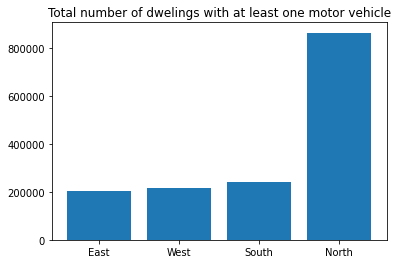

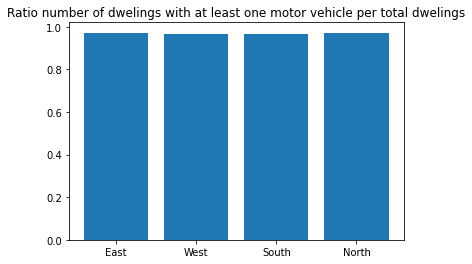

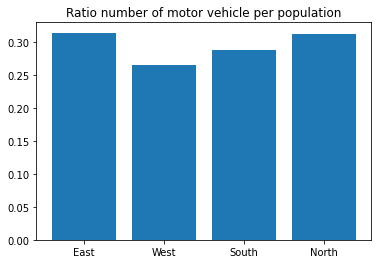

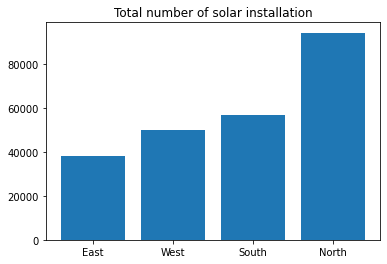

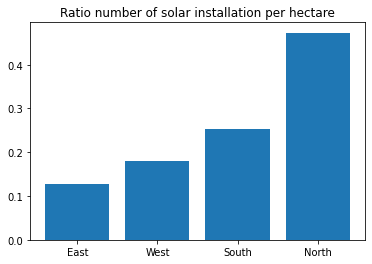

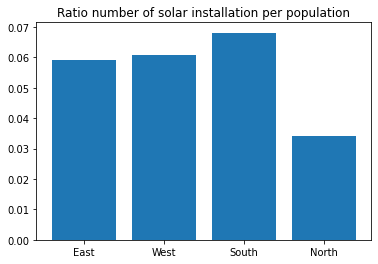

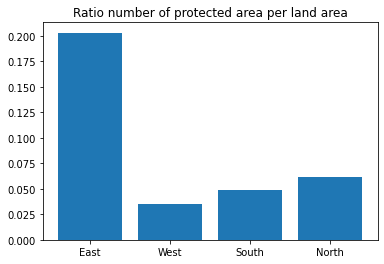

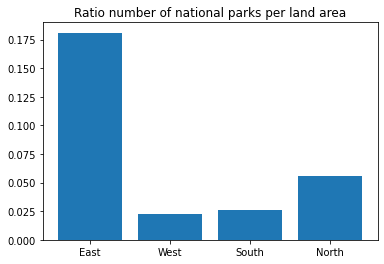

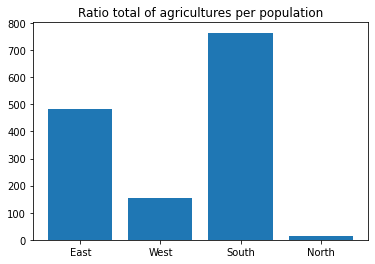

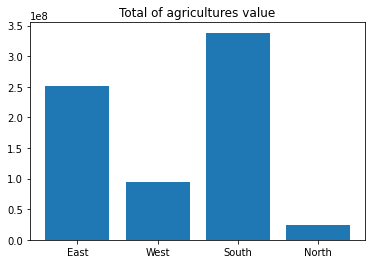

In [ ]:
for type_analysis in ['electric_cars', 'solar', 'recycling']:
    for analysis_aspect in analysis['east'][type_analysis].keys():
        x = ['East', 'West', 'South', 'North']
        y = [analysis['east'][type_analysis][analysis_aspect],
             analysis['west'][type_analysis][analysis_aspect],
             analysis['south'][type_analysis][analysis_aspect],
             analysis['north'][type_analysis][analysis_aspect]]

        plt.bar(x, y)
        plt.title(analysis_result['description'][analysis_aspect])
        plt.show()

In [ ]:
import json

json.dump(analysis_result)

TypeError: ignored